# IMU LSTM Model Visualization

This notebook visualizes the training process, evaluates the model on the test set, and plots the predicted vs. actual x and y coordinates.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lstm_model import IMULSTMModel
import os
from tqdm import tqdm
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from lstm_test import IMUSequence, load_data, evaluate_model, test_model

## Set up model parameters

In [2]:
input_size = 12
hidden_sizes = [64]
output_size = 3
sequence_length = 200

## Evaluate the trained model

In [3]:
# Initialize the model
model = IMULSTMModel(input_size, hidden_sizes, output_size)

# Load the trained model
model.load_state_dict(torch.load('../../model/best_imu_lstm_model.pth'))
model.eval()

# Usage
root_dir = '../../data/Oxford Inertial Odometry Dataset/handheld_test'


test_loss, predictions, targets, overall_metrics = test_model(model, args.test_root_dir, args.sequence_length, args.output_size)

# Log test results to TensorBoard
print("Test/Loss", test_loss, 0)

# Log all metrics
for metric, value in overall_metrics.items():
    print(f"Test/{metric}", value, 0)


# Sequence: data5/imu1.csv
# ATE_mean: 1.1046
# ATE_max: 3.8172
# RTE_mean: 1.3101
# RTE_max: 1.4545
# MSE: 0.5724
# MAE: 0.4717
# RMSE: 0.7566

/tmp/ipykernel_394618/1685062181.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('../../model/best_imu_lstm_model.pth'))



Starting model evaluation...
Testing Dataset Information:
Number of sequences: 4
Model Sequence length: 200


Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

Start evaluating


Evaluating:  25%|██▌       | 1/4 [00:12<00:37, 12.65s/it]


Sequence: data5/imu1.csv
ATE_mean: 1.1046
ATE_max: 3.8172
RTE_mean: 1.3101
RTE_max: 1.4545
MSE: 0.5724
MAE: 0.4717
RMSE: 0.7566
Start evaluating


Evaluating:  50%|█████     | 2/4 [00:36<00:38, 19.40s/it]


Sequence: data5/imu2.csv
ATE_mean: 0.9094
ATE_max: 3.9661
RTE_mean: 1.0629
RTE_max: 1.3497
MSE: 0.3875
MAE: 0.3839
RMSE: 0.6225
Start evaluating


Evaluating:  75%|███████▌  | 3/4 [01:00<00:21, 21.28s/it]


Sequence: data5/imu3.csv
ATE_mean: 0.8629
ATE_max: 3.4258
RTE_mean: 1.0190
RTE_max: 1.2112
MSE: 0.3462
MAE: 0.3676
RMSE: 0.5884
Start evaluating


Evaluating: 100%|██████████| 4/4 [01:15<00:00, 18.83s/it]


Sequence: data5/imu4.csv
ATE_mean: 0.8280
ATE_max: 3.2002
RTE_mean: 1.0001
RTE_max: 1.3509
MSE: 0.3386
MAE: 0.3553
RMSE: 0.5819

Overall Test Loss: 0.3964
Predictions shape: (183042, 3)
Targets shape: (183042, 3)

Overall Metrics:
ATE_mean: 0.9120
ATE_max: 3.9661
RTE_mean: 1.0791
RTE_max: 1.4545
MSE: 0.3964
MAE: 0.3881
RMSE: 0.6296


ValueError: too many values to unpack (expected 3)

## Visualize predictions vs. actual coordinates

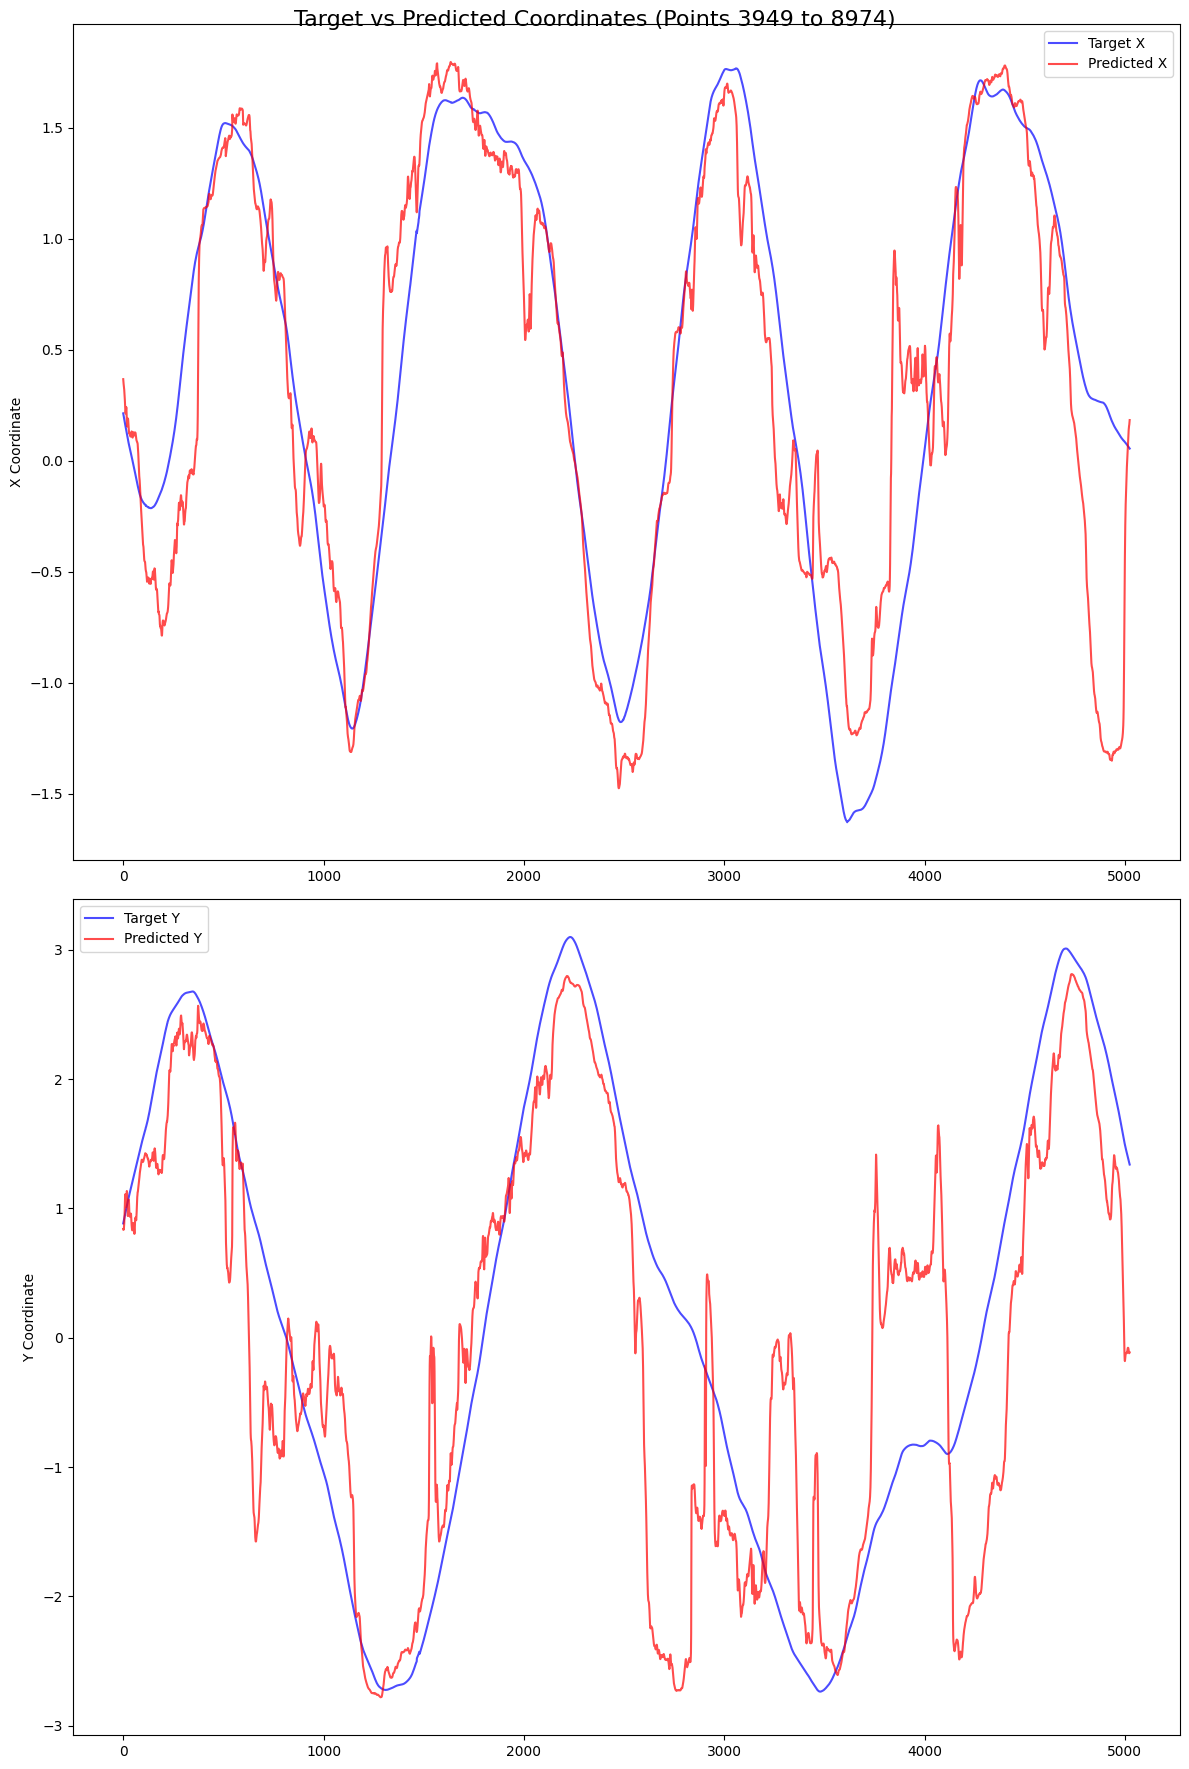

Number of points: 5025
X coordinate - Mean absolute error: 0.3358
Y coordinate - Mean absolute error: 0.8161


In [30]:
import matplotlib.pyplot as plt

# Define the range for the first sequence
start_point = 3949
end_point = 8974

# Extract the relevant portion of the data
range_predictions = predictions[start_point:end_point]
range_targets = targets[start_point:end_point]

# Create a 3x1 subplot for X, Y, and Z coordinates
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))
fig.suptitle(f'Target vs Predicted Coordinates (Points {start_point} to {end_point})', fontsize=16)

# Plot X coordinates
ax1.plot(range(len(range_targets)), range_targets[:, 0], 'b-', label='Target X', alpha=0.7)
ax1.plot(range(len(range_predictions)), range_predictions[:, 0], 'r-', label='Predicted X', alpha=0.7)
ax1.set_ylabel('X Coordinate')
ax1.legend()

# Plot Y coordinates
ax2.plot(range(len(range_targets)), range_targets[:, 1], 'b-', label='Target Y', alpha=0.7)
ax2.plot(range(len(range_predictions)), range_predictions[:, 1], 'r-', label='Predicted Y', alpha=0.7)
ax2.set_ylabel('Y Coordinate')
ax2.legend()

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Number of points: {len(range_targets)}")
print(f"X coordinate - Mean absolute error: {np.mean(np.abs(range_predictions[:, 0] - range_targets[:, 0])):.4f}")
print(f"Y coordinate - Mean absolute error: {np.mean(np.abs(range_predictions[:, 1] - range_targets[:, 1])):.4f}")